<a href="https://colab.research.google.com/github/Aaryan701/Diabetic-Prediction/blob/main/chapter_appendix-tools-for-deep-learning/jupyter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

importing all the necessary libraries


In [19]:
import IPython
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from statistics import mode
import pandas.plotting as plotting

Loading and exploring the data

In [20]:
dataoriginal = pd.read_csv("/content/diabetic_data.csv")
print(dataoriginal.shape)
print(dataoriginal.info())
print(dataoriginal.describe())

(101766, 50)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int

In [4]:
dataoriginal.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [6]:
datacopy = dataoriginal.copy()
Rep = datacopy.replace('?', np.nan)
nacheck = Rep.isnull().sum()
nacheck

,0
encounter_id,0
patient_nbr,0
race,2273
gender,0
age,0
weight,98569
admission_type_id,0
discharge_disposition_id,0
admission_source_id,0
time_in_hospital,0


In [9]:
datacopy=datacopy.drop(['weight','payer_code','medical_specialty'],axis=1)

In [10]:
datacopy['readmitted']

,readmitted
0,NO
1,>30
2,NO
3,NO
4,NO
...,...
101761,>30
101762,NO
101763,NO
101764,NO


In [11]:
datacopy['readmit']=np.where(datacopy['readmitted']=='NO',0,1)

In [14]:
datacopy.groupby('readmit').size()

,0
readmit,
0,54864
1,46902


In [15]:
datacopy = datacopy[((datacopy.discharge_disposition_id != 11) &
                                          (datacopy.discharge_disposition_id != 13) &
                                          (datacopy.discharge_disposition_id != 14) &
                                          (datacopy.discharge_disposition_id != 19) &
                                          (datacopy.discharge_disposition_id != 20) &
                                          (datacopy.discharge_disposition_id != 21))]

In [16]:
datacopy.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,readmit
0,2278392,8222157,Caucasian,Female,[0-10),6,25,1,1,41,...,No,No,No,No,No,No,No,No,NO,0
1,149190,55629189,Caucasian,Female,[10-20),1,1,7,3,59,...,Up,No,No,No,No,No,Ch,Yes,>30,1
2,64410,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,11,...,No,No,No,No,No,No,No,Yes,NO,0
3,500364,82442376,Caucasian,Male,[30-40),1,1,7,2,44,...,Up,No,No,No,No,No,Ch,Yes,NO,0
4,16680,42519267,Caucasian,Male,[40-50),1,1,7,1,51,...,Steady,No,No,No,No,No,Ch,Yes,NO,0


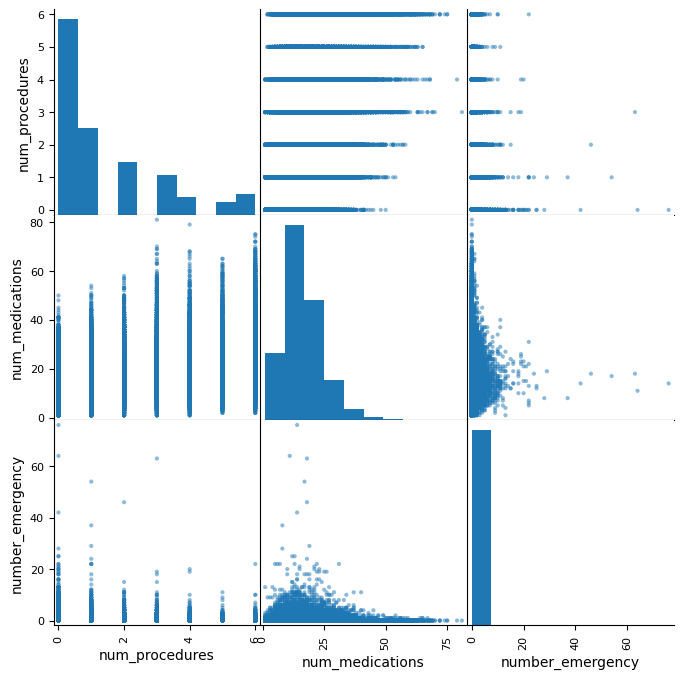

In [21]:
import seaborn as sns
sm = plotting.scatter_matrix(datacopy[['num_procedures', 'num_medications', 'number_emergency']], figsize = (8, 8))
sns.despine()

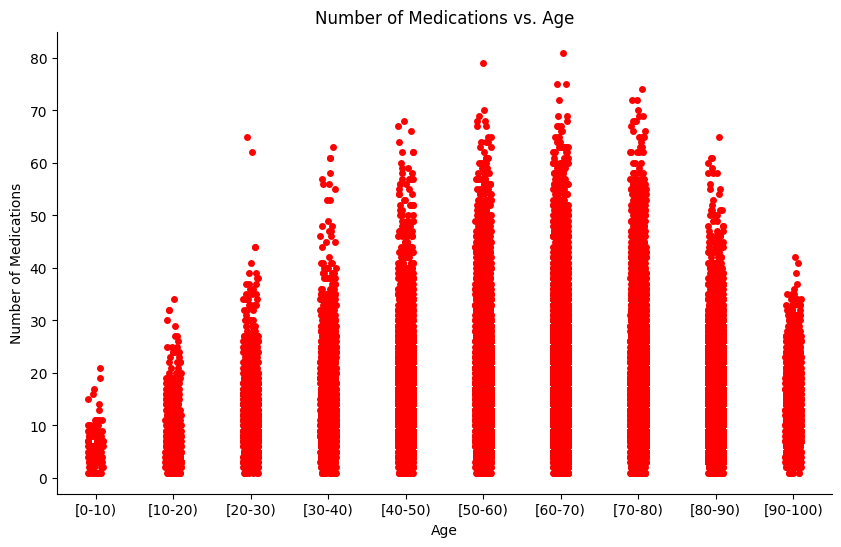

In [22]:
sortage = datacopy.sort_values(by = 'age')
x = sns.stripplot(x = "age", y = "num_medications", data = sortage, color = 'red')
sns.despine() #remove top and right axes
x.figure.set_size_inches(10, 6)
x.set_xlabel('Age')
x.set_ylabel('Number of Medications')
x.axes.set_title('Number of Medications vs. Age')
plt.show()

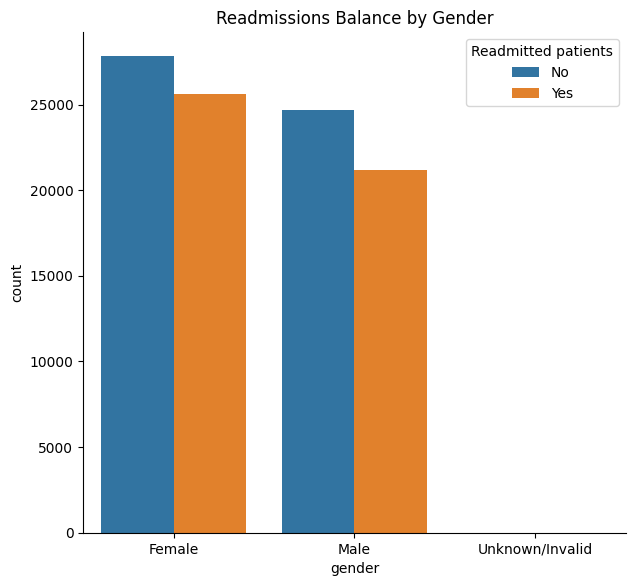

In [24]:
plot1 = sns.countplot(x = 'gender', hue = 'readmit', data = datacopy)

sns.despine()
plot1.figure.set_size_inches(7, 6.5)
plot1.legend(title = 'Readmitted patients', labels = ('No', 'Yes'))
plot1.axes.set_title('Readmissions Balance by Gender')
plt.show()

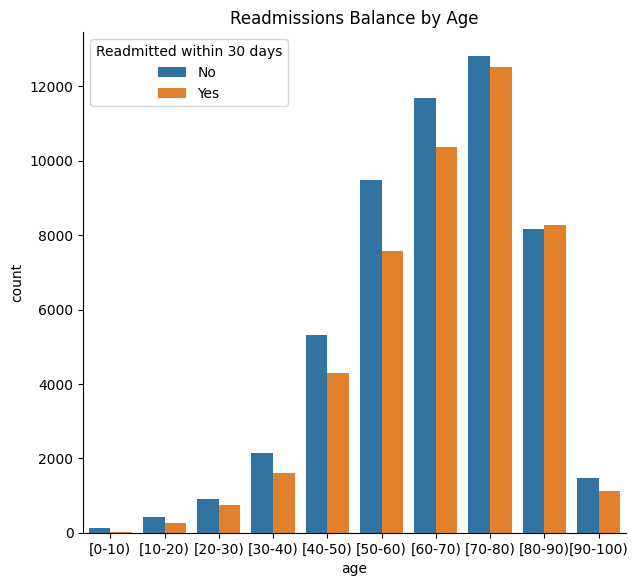

In [25]:
b = datacopy.age.unique()
b.sort()
b_sort = np.array(b).tolist()


ageplt = sns.countplot(x = 'age', hue = 'readmit', data = datacopy, order = b_sort)

sns.despine()
ageplt.figure.set_size_inches(7, 6.5)
ageplt.legend(title = 'Readmitted within 30 days', labels = ('No', 'Yes'))
ageplt.axes.set_title('Readmissions Balance by Age')
plt.show()

<Axes: xlabel='age', ylabel='count'>

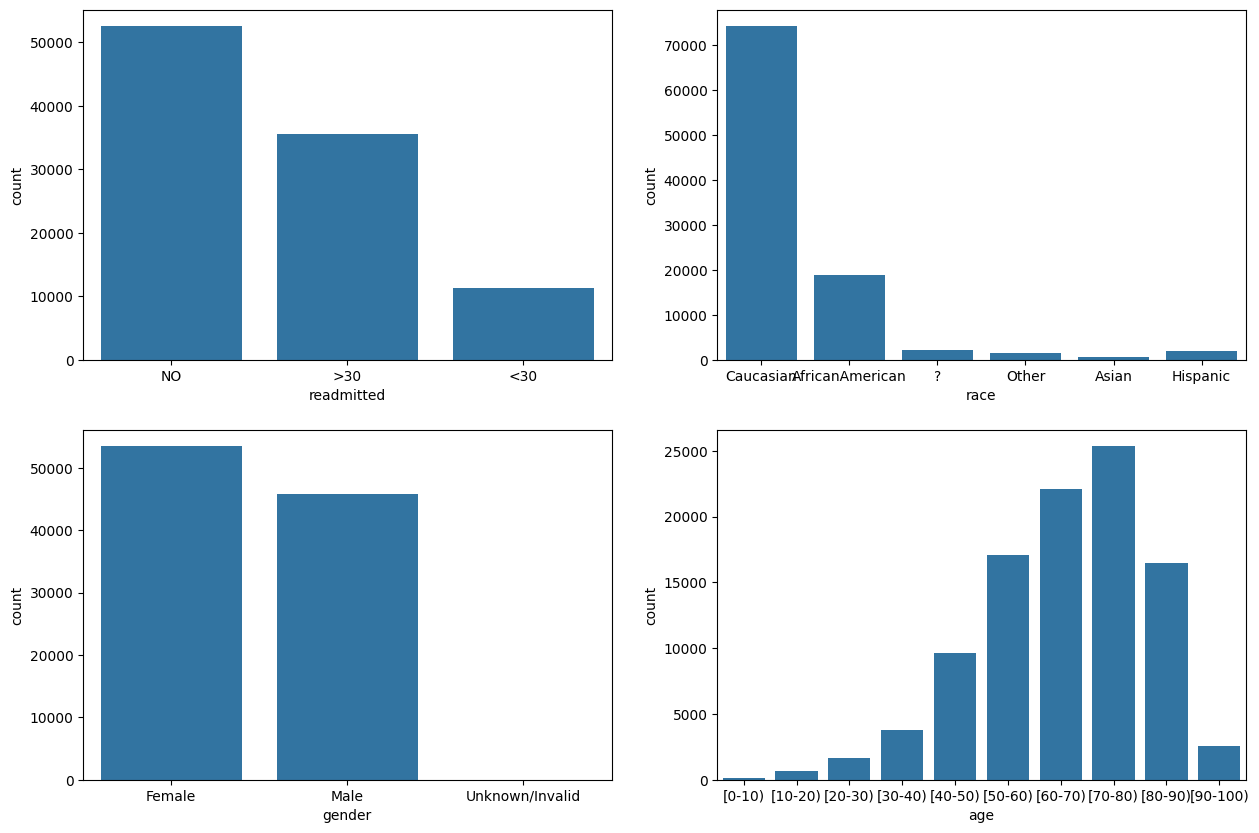

In [26]:
fig, ax = plt.subplots(figsize=(15,10), ncols=2, nrows=2)

sns.countplot(x="readmitted", data=datacopy, ax=ax[0][0])
sns.countplot(x="race", data=datacopy, ax=ax[0][1])
sns.countplot(x="gender", data=datacopy, ax=ax[1][0])
sns.countplot(x="age", data=datacopy, ax=ax[1][1])